In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pathlib
import os
from torchvision import datasets, transforms, models
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler

In [22]:
!unzip '/content/drive/My Drive/weather/classification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: weather_classification/thunder/thunder_05001.jpg  
  inflating: weather_classification/thunder/thunder_05002.jpg  
  inflating: weather_classification/thunder/thunder_05003.jpg  
  inflating: weather_classification/thunder/thunder_05004.jpg  
  inflating: weather_classification/thunder/thunder_05005.jpg  
  inflating: weather_classification/thunder/thunder_05006.jpg  
  inflating: weather_classification/thunder/thunder_05007.jpg  
  inflating: weather_classification/thunder/thunder_05008.jpg  
  inflating: weather_classification/thunder/thunder_05009.jpg  
  inflating: weather_classification/thunder/thunder_05010.jpg  
  inflating: weather_classification/thunder/thunder_05011.jpg  
  inflating: weather_classification/thunder/thunder_05012.jpg  
  inflating: weather_classification/thunder/thunder_05013.jpg  
  inflating: weather_classification/thunder/thunder_05014.jpg  
  inflating: weather_classification/thunder/thunder_0

In [0]:
path='/content/weather_classification'

In [7]:
root=pathlib.Path(path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)
print("No_of_classes",len(classes))

['cloudy', 'haze', 'rainy', 'snow', 'sunny', 'thunder']
No_of_classes 6


In [0]:
transform = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])
train_transform=transforms.Compose([transforms.RandomResizedCrop(224),
    #transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transform=transforms.Compose([transforms.RandomResizedCrop(255),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [8]:
data=datasets.ImageFolder(path,transform=transform)
data_loader=torch.utils.data.DataLoader(data,batch_size=64,shuffle=False)
print(len(data))
images,labels=next(iter(data_loader))
numpy_images = images.numpy()
per_image_mean = np.mean(numpy_images, axis=(2,3)) 
per_image_std = np.std(numpy_images, axis=(2,3))

pop_channel_mean = np.mean(per_image_mean, axis=0) 
pop_channel_std = np.mean(per_image_std, axis=0) 
mean=(pop_channel_mean )
std=(pop_channel_std)
print(mean,std)

60000
[0.49087867 0.49626142 0.46685916] [0.21056959 0.21044758 0.21877891]


In [9]:
valid_size = 0.166
test_size=0.16
train_data=datasets.ImageFolder(path,transform=train_transform)
valid_data=datasets.ImageFolder(path,transform=test_transform)
test_data=datasets.ImageFolder(path,transform=test_transform)
num_data=len(train_data)
indices=list(range(num_data))
np.random.shuffle(indices)
valid_split=int(np.floor(valid_size*num_data))
test_split=int(np.floor(test_size*num_data))
valid_idx,test_idx,train_idx= indices[:valid_split], indices[valid_split:(test_split+valid_split)], indices[(test_split+valid_split):]

print("valid",len(valid_idx))
print("test",len(test_idx))
print("train",len(train_idx))

valid 9960
test 9600
train 40440


In [0]:
batch_size=20
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler= SubsetRandomSampler(test_idx)
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
    sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    sampler=test_sampler)

In [0]:
def visualize(loader, classes, num_of_image=4, fig_size=(25, 5)):
  
    data_iter = iter(loader)
    images, labels = data_iter.next()

    fig = plt.figure(figsize=fig_size)
    for idx in range(num_of_image):
        ax = fig.add_subplot(1, 5, idx + 1, xticks=[], yticks=[])
        # denormalize first
        img = images[idx] #/ 2 + 0.5
        npimg = img.numpy()
        img = np.transpose(npimg, (1, 2, 0))  # transpose
        ax.imshow(img, cmap='gray')
        ax.set_title(classes[labels[idx]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


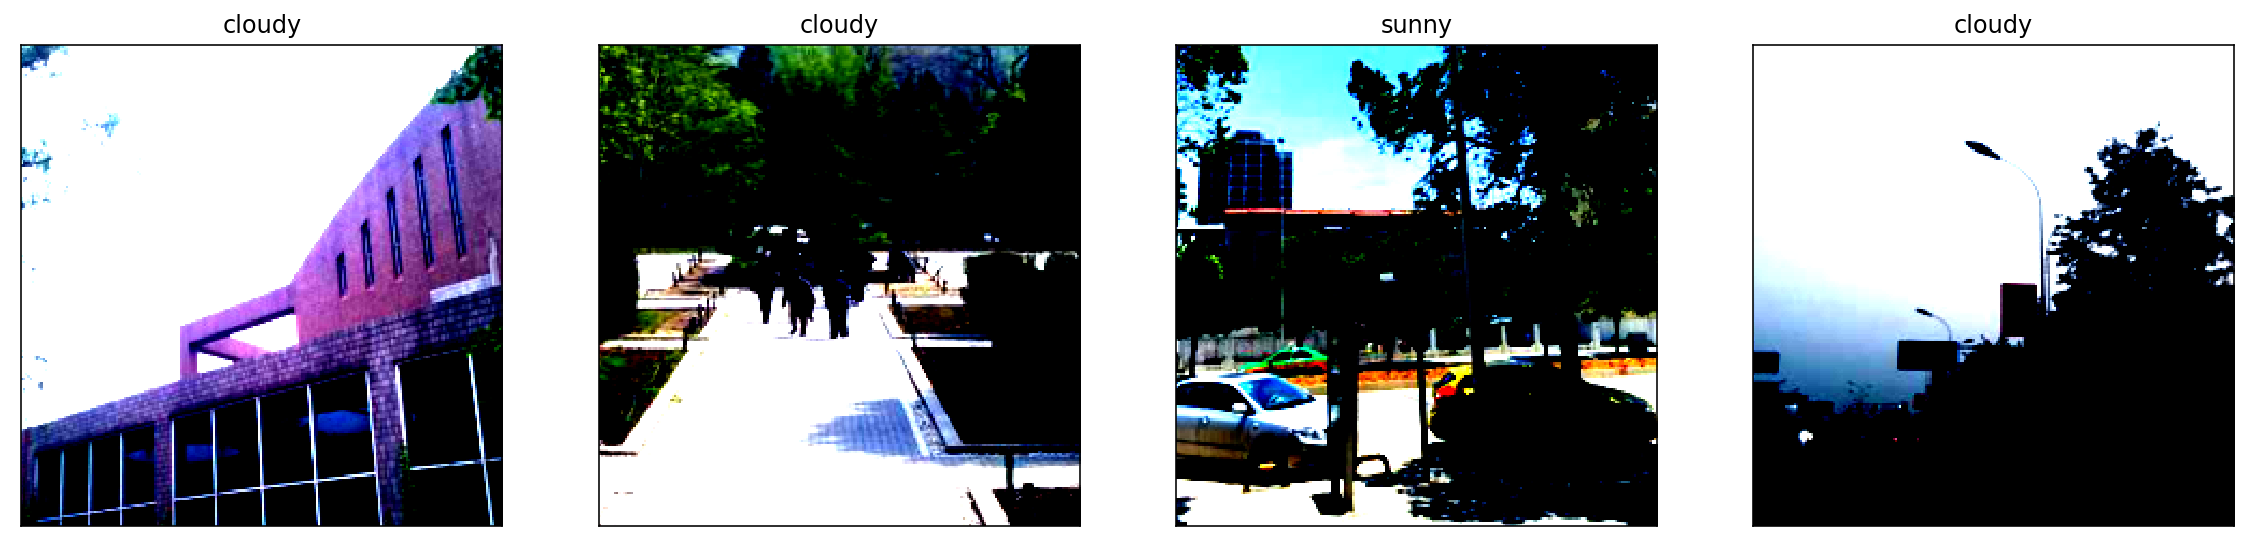

In [30]:
visualize(train_loader,classes)

In [0]:
classes=train_data.classes

In [0]:
model=models.densenet121(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

In [0]:
#model = torch.hub.load('pytorch/vision:v0.5.0', 'densenet121', pretrained=False)
#for param in model.parameters():
    #param.requires_grad = True

Downloading: "https://github.com/pytorch/vision/archive/v0.5.0.zip" to /root/.cache/torch/hub/v0.5.0.zip


In [12]:
from collections import OrderedDict
classifier=nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 512)),
                          ('relu', nn.LeakyReLU()),
                          ('fc2', nn.Linear(512, 256)),
                          ('relu', nn.LeakyReLU()),
                          ('fc3', nn.Linear(256, 6)),
                          
                          ]))
    
model.classifier= classifier
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [13]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
criterion=nn.CrossEntropyLoss()
opt=optim.Adam(model.parameters(),lr=0.00001)
if train_on_gpu:
    model.cuda()

CUDA is available!  Training on GPU ...


In [0]:
n_epochs = 30

valid_loss_min = np.Inf 

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for data, labels in train_loader:
        if train_on_gpu:
            data, labels = data.cuda(), labels.cuda()
        opt.zero_grad()
        output = model(data)
        loss = criterion(output, labels)
        loss.backward()
        opt.step()
        #print("1")
        train_loss += loss.item()*data.size(0)
        model.eval()
    for data, labels in valid_loader:
        if train_on_gpu:
            data, labels = data.cuda(), labels.cuda()
        output = model(data)
        #print("11")
        loss = criterion(output, labels) 
        valid_loss += loss.item()*data.size(0)
    
   
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_densnet121.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.724369 	Validation Loss: 0.609327
Validation loss decreased (inf --> 0.609327).  Saving model ...
Epoch: 2 	Training Loss: 0.549705 	Validation Loss: 0.565633
Validation loss decreased (0.609327 --> 0.565633).  Saving model ...
Epoch: 3 	Training Loss: 0.500783 	Validation Loss: 0.550163
Validation loss decreased (0.565633 --> 0.550163).  Saving model ...
Epoch: 4 	Training Loss: 0.471691 	Validation Loss: 0.496684
Validation loss decreased (0.550163 --> 0.496684).  Saving model ...
Epoch: 5 	Training Loss: 0.446084 	Validation Loss: 0.500934
Epoch: 6 	Training Loss: 0.429411 	Validation Loss: 0.470461
Validation loss decreased (0.496684 --> 0.470461).  Saving model ...
Epoch: 7 	Training Loss: 0.411068 	Validation Loss: 0.475251
Epoch: 8 	Training Loss: 0.392355 	Validation Loss: 0.543960
Epoch: 9 	Training Loss: 0.377525 	Validation Loss: 0.471545
Epoch: 10 	Training Loss: 0.369503 	Validation Loss: 0.467197
Validation loss decreased (0.470461 --> 0.467197)

In [14]:
model.load_state_dict(torch.load('model_densnet121.pt'))

<All keys matched successfully>

In [34]:
batch_size=20
test_loss = 0.0
accuracy=0
class_correct = list(0. for i in range(8))
class_total = list(0. for i in range(8))

#model1.eval()
for data, target in test_loader:
    
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    #_, pred = torch.max(output, 1) 
    ps=torch.exp(output)
    top_ps,top_class=ps.topk(1,dim=1)
    equ=top_class==target.view(*top_class.shape)
    accuracy+=torch.mean(equ.type(torch.FloatTensor))
print("accuracy",accuracy/len(test_loader)*100)

accuracy tensor(89.3438)


In [15]:
batch_size=20
test_loss = 0.0
class_correct = list(0. for i in range(6))
class_total = list(0. for i in range(6))

import numpy
model.eval()
for data, target in test_loader:
    
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)   
    correct_tensor = pred.eq(target.data.view_as(pred))
    #print(correct_tensor)
    correct=np.squeeze(correct_tensor.cpu().numpy())
    #print(len(target.data))
    for i in range(len(target.data)-1):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_loader)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(6):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))



Test Loss: 5.794341

Test Accuracy of cloudy: 76% (1174/1531)
Test Accuracy of  haze: 84% (1270/1496)
Test Accuracy of rainy: 92% (1443/1555)
Test Accuracy of  snow: 94% (1390/1478)
Test Accuracy of sunny: 89% (1340/1504)
Test Accuracy of thunder: 99% (1544/1556)

Test Accuracy (Overall): 89% (8161/9120)


In [9]:
model.load_state_dict(torch.load('/content/model_densnet121.pt'))
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
def prediction(path):
    image = Image.open(path).convert('RGB')
    image_tensor = test_transform(image).float()
    
    image_tensor = image_tensor.unsqueeze_(0)
    
    #PIL_image = Image.fromarray((path*255).astype(np.uint8))
    #image=test_transform(path).unsqueeze(0)
    predicted_label=np.argmax(model(image_tensor).detach().cpu())
    #print(predicted_label.numpy())
    print("Predicted weather-"+str(weather[predicted_label.numpy()]))


In [0]:
weather=['cloudy','haze','rainy','snow','sunny','thunder']

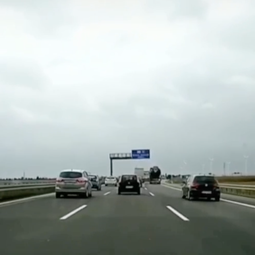

In [19]:

from PIL import Image 
im = Image.open('/content/pic1.png')
im = im.resize((255,255), Image.ANTIALIAS)
im

In [18]:
prediction('/content/pic1.png')

Predicted weather-cloudy


In [0]:
import torch
import torch.onnx

In [6]:
state_dict = torch.load('/content/model_densnet121.pt')
# Load the weights now into a model net architecture defined by our class
model.load_state_dict(state_dict)

<All keys matched successfully>

In [0]:
dummy_input = torch.randn(1, 3, 255,255)
torch.onnx.export(model, dummy_input, "onnx_waether.onnx")